In [16]:
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import json

In [23]:
with open('OpenPose.json') as f:
  file = json.load(f)

In [24]:
data = file['data']
x_train =[]
y_train = []

def labelToNumerical(label):
    if label == 'WarriorPoseI':
        return 0
    if label == 'WarriorPoseII':
        return 1
    if label == 'WarriorPoseIII':
        return 2
    if label == 'TreePose':
        return 3

i = 0
for i in range(len(data)):
    kpsArr = []
    labels = []
    for kps in data[i]['xs'].items():
        print
        kpsArr.append(kps[1])
    for label in data[i]['ys'].items():
        labels.append(labelToNumerical(label[1]))
    x_train.append(kpsArr)
    y_train.append(labels)
    

In [25]:
print(x_train[0])
x_train = np.asarray(x_train)
print(x_train.shape)
print(x_train[0])

[0, 0, 481.95, 640.0, 495.3375, 613.3333333333334, 508.725, 426.6666666666667, 428.4, 266.6666666666667, 468.5625, 666.6666666666666, 415.0125, 453.3333333333333, 334.6875, 293.3333333333333, 575.6625, 853.3333333333334, 307.9125, 1146.6666666666667, 200.8125, 1306.6666666666667, 589.05, 880.0, 696.15, 960.0, 736.3125, 1120.0, 0, 0, 0, 0, 455.175, 533.3333333333334, 388.2375, 613.3333333333334]
(110, 36)
[   0.            0.          481.95        640.          495.3375
  613.33333333  508.725       426.66666667  428.4         266.66666667
  468.5625      666.66666667  415.0125      453.33333333  334.6875
  293.33333333  575.6625      853.33333333  307.9125     1146.66666667
  200.8125     1306.66666667  589.05        880.          696.15
  960.          736.3125     1120.            0.            0.
    0.            0.          455.175       533.33333333  388.2375
  613.33333333]


In [11]:
print(y_train[0])
y_train = np.asarray(y_train)
print(y_train.shape)
print(y_train[0])

[0]
(152, 1)
[0]


In [12]:
y_cat_train = to_categorical(y_train,4)

In [13]:
y_cat_train[0]

array([1., 0., 0., 0.], dtype=float32)

# Building the model

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_cat_train, validation_split=0.2, verbose=1, epochs=100)

Train on 121 samples, validate on 31 samples
Epoch 1/100
121/121 [==============================] - 0s 2ms/step - loss: 366.6542 - accuracy: 0.0083 - val_loss: 249.9700 - val_accuracy: 0.0000e+00
Epoch 2/100
121/121 [==============================] - 0s 41us/step - loss: 241.4447 - accuracy: 0.0413 - val_loss: 164.9237 - val_accuracy: 0.0000e+00
Epoch 3/100
121/121 [==============================] - 0s 58us/step - loss: 182.3717 - accuracy: 0.0579 - val_loss: 86.7679 - val_accuracy: 0.0000e+00
Epoch 4/100
121/121 [==============================] - 0s 41us/step - loss: 107.1335 - accuracy: 0.2810 - val_loss: 36.9450 - val_accuracy: 0.0000e+00
Epoch 5/100
121/121 [==============================] - 0s 50us/step - loss: 75.4896 - accuracy: 0.3719 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 6/100
121/121 [==============================] - 0s 41us/step - loss: 54.8550 - accuracy: 0.5207 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
121/121 [==============================] - 0

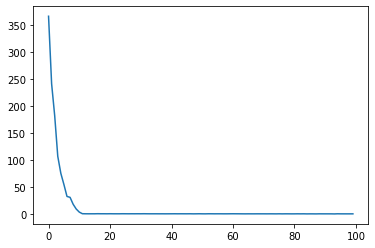

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])


In [12]:
model.save('test.h5')